<a href="https://colab.research.google.com/github/mechamrit/tensorflow_in_practice/blob/master/01_cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cat vs Dog using data augumentation

In [0]:
import os

In [0]:
# We will import  dataset from kaggle
from google.colab import files
files.upload()

In [3]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 71 Oct  3 11:50 kaggle.json


In [4]:
!pip install -q kaggle
!pip install -q kaggle-cli


     |████████████████████████████████| 81kB 415kB/s 
     |████████████████████████████████| 5.3MB 1.1MB/s 
     |████████████████████████████████| 51kB 20.0MB/s 
     |████████████████████████████████| 112kB 45.8MB/s 
     |████████████████████████████████| 112kB 46.2MB/s 


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets list

ref                                                       title                                               size  lastUpdated          downloadCount  
--------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
bradklassen/pga-tour-20102018-data                        PGA Tour Golf Data                                  98MB  2019-10-02 14:55:56           6910  
martj42/international-football-results-from-1872-to-2017  International football results from 1872 to 2019   525KB  2019-10-02 16:51:16          22133  
dgomonov/new-york-city-airbnb-open-data                   New York City Airbnb Open Data                       2MB  2019-08-12 16:24:45          23800  
lakshyaag/india-trade-data                                India - Trade Data                                   1MB  2019-08-16 16:13:58          11239  
therohk/ireland-historical-news                           The Irish Times - Waxy-W

In [7]:
!kaggle datasets download -d tongpython/cat-and-dog

 96% 209M/218M [00:05<00:00, 24.3MB/s]
100% 218M/218M [00:05<00:00, 39.1MB/s]


In [0]:
!mkdir -p /content/cat-and-dog/

In [0]:
!unzip cat-and-dog.zip -d /content/cat-and-dog/

In [10]:
print(len(os.listdir("/content/cat-and-dog/training_set/training_set/cats/")))
print(len(os.listdir("/content/cat-and-dog/training_set/training_set/dogs/")))
# !ls "/content/cat-and-dog/training_set/training_set/dogs/")
# !rm -rf cat-and-dog

4001
4006


In [11]:
print(len(os.listdir("/content/cat-and-dog/test_set/test_set/dogs/")))
print(len(os.listdir("/content/cat-and-dog/test_set/test_set/cats/")))

1013
1012


In [12]:
import tensorflow as tf

## Creating model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
                                   
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
TRAINING_DIR = "/content/cat-and-dog/training_set/training_set"

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "/content/cat-and-dog/test_set/test_set/"
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))



Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [14]:
history = model.fit_generator(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/15
81/81 [==============================] - 84s 1s/step - loss: 0.7646 - acc: 0.5543 - val_loss: 0.6555 - val_acc: 0.5937
Epoch 2/15
81/81 [==============================] - 78s 962ms/step - loss: 0.6622 - acc: 0.6165 - val_loss: 0.6275 - val_acc: 0.6693
Epoch 3/15
81/81 [==============================] - 77s 953ms/step - loss: 0.6310 - acc: 0.6462 - val_loss: 0.6789 - val_acc: 0.5798
Epoch 4/15
81/81 [==============================] - 78s 960ms/step - loss: 0.6340 - acc: 0.6677 - val_loss: 0.5735 - val_acc: 0.6925
Epoch 5/15
81/81 [==============================] - 77s 956ms/step - loss: 0.5929 - acc: 0.6844 - val_loss: 0.6219 - val_acc: 0.6441
Epoch 6/15
81/81 [==============================] - 77s 951ms/step - loss: 0.5806 - acc: 0.6892 - val_loss: 0.5689 - val_acc: 0.6876
Epoch 7/15
81/81 [==============================] - 77s 955ms/step - loss: 0.5712 - acc: 0.6976 - val_loss: 0.5472 - val_acc: 0.7128
Epoch 8/15
81/81 [==============================] - 78s 965ms/step - los

<Figure size 432x288 with 0 Axes>

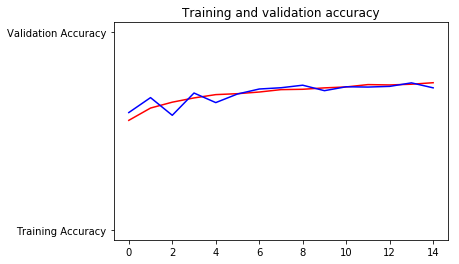

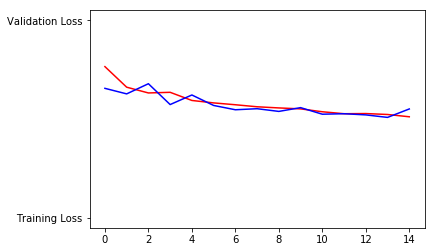

<Figure size 432x288 with 0 Axes>

In [17]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()




In [22]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:A
    print(fn + " is a cat")

Saving dog.jpeg to dog.jpeg
[1.]
dog.jpeg is a dog


In [24]:
history = model.fit_generator(train_generator,
                              epochs=40,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/40
81/81 [==============================] - 86s 1s/step - loss: 0.5124 - acc: 0.7453 - val_loss: 0.5953 - val_acc: 0.6935
Epoch 2/40
81/81 [==============================] - 77s 949ms/step - loss: 0.5017 - acc: 0.7578 - val_loss: 0.5009 - val_acc: 0.7430
Epoch 3/40
81/81 [==============================] - 77s 951ms/step - loss: 0.4911 - acc: 0.7575 - val_loss: 0.5223 - val_acc: 0.7459
Epoch 4/40
81/81 [==============================] - 77s 945ms/step - loss: 0.4909 - acc: 0.7635 - val_loss: 0.4830 - val_acc: 0.7632
Epoch 5/40
81/81 [==============================] - 78s 966ms/step - loss: 0.4820 - acc: 0.7679 - val_loss: 0.5422 - val_acc: 0.7301
Epoch 6/40
81/81 [==============================] - 77s 945ms/step - loss: 0.4872 - acc: 0.7701 - val_loss: 0.7646 - val_acc: 0.6752
Epoch 7/40
81/81 [==============================] - 77s 955ms/step - loss: 0.4887 - acc: 0.7668 - val_loss: 0.4773 - val_acc: 0.7687
Epoch 8/40
81/81 [==============================] - 77s 948ms/step - los

<Figure size 432x288 with 0 Axes>

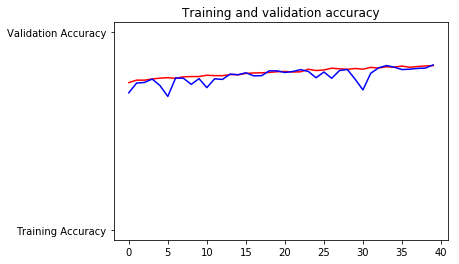

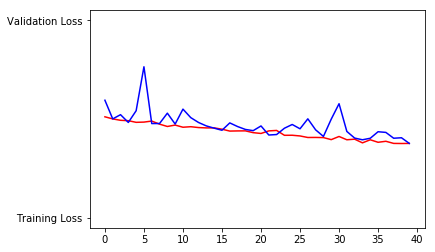

<Figure size 432x288 with 0 Axes>

In [26]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


